<a href="https://colab.research.google.com/github/KHANmdAFFAN/Product-Sales-Outlet-at-BigMart-Datawarehouse/blob/main/Mini_Project__AFFAN_KHAN_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline    
import seaborn as sns 
import seaborn as sns
sns.set(color_codes = True)
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.simplefilter('ignore')  


In [2]:
df_train = pd.read_csv("/content/Train.csv")
df_test = pd.read_csv("/content/Test.csv")

TRAIN DATASET

In [3]:
df_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
df_train.shape

(8523, 12)

In [5]:
df_train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

TEST DATA SET

In [6]:
df_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [7]:
df_test.shape

(5681, 11)

In [8]:
df_test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [9]:
# storing the length
train_len =len(df_train)
test_len = len(df_test)

EXPLORATORY DATA ANALYSIS

In [10]:
continuous_variable = df_train.select_dtypes(include=['float64']).columns
print(continuous_variable)
categorical_variable= df_train.select_dtypes(include=['object']).columns
print("*"*200)
print(categorical_variable)

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales'], dtype='object')
********************************************************************************************************************************************************************************************************
Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')


In [11]:
categorial_features = df_train.select_dtypes(include=[np.object])
categorial_features.head()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2
2,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1
3,FDX07,Regular,Fruits and Vegetables,OUT010,NaN,Tier 3,Grocery Store
4,NCD19,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1


In [12]:
continuous_features = df_train.select_dtypes(include=[np.float64])
continuous_features.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales
0,9.30,0.016047,249.8092,3735.1380
1,5.92,0.019278,48.2692,443.4228
2,17.50,0.016760,141.6180,2097.2700
3,19.20,0.000000,182.0950,732.3800
4,8.93,0.000000,53.8614,994.7052


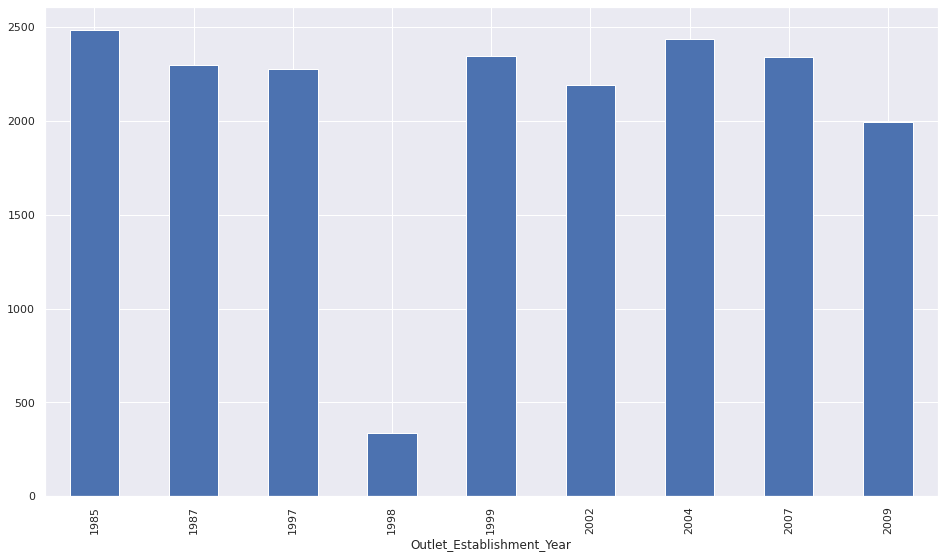

In [13]:
plt.figure(figsize=(16,9))
df_train.groupby('Outlet_Establishment_Year')['Item_Outlet_Sales'].mean().plot.bar()


## UNIVARIATE ANALYSIS

Text(0.5, 1.0, 'ITEM CONTAIN FAT')

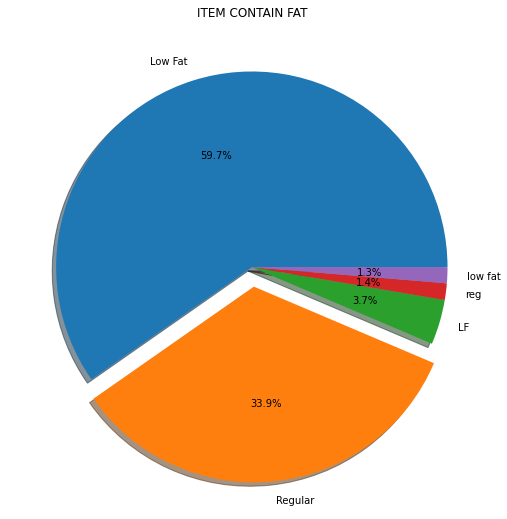

In [14]:
Item_fat = df_train['Item_Fat_Content'].value_counts()/len(df_train)*100
plt.figure(figsize=(12,9))
plt.style.use('default')
plt.pie(Item_fat ,labels= Item_fat.index, explode = (0,0.10,0,0,0), shadow =True , autopct = '%1.1f%%')
plt.title('ITEM CONTAIN FAT')


In [15]:
df_train['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text major ticklabel objects>)

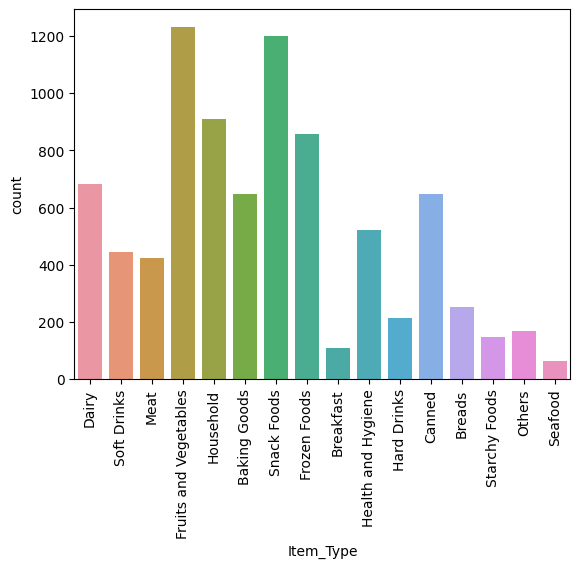

In [16]:
sns.countplot(df_train.Item_Type)
plt.xticks(rotation=90)

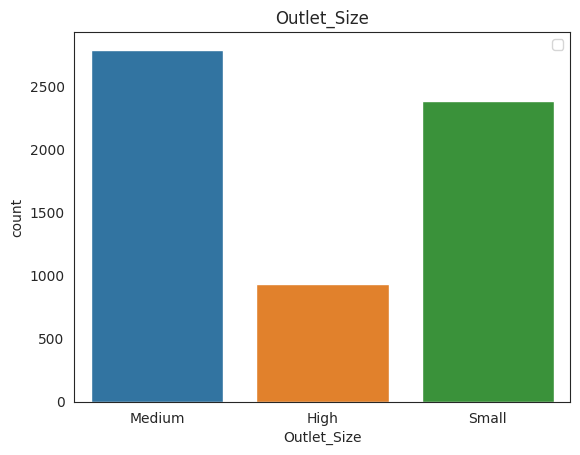

In [17]:
sns.set_style('white')
sns.countplot(df_train['Outlet_Size'])
plt.title('Outlet_Size')
plt.legend()
plt.show()


# BIVARIATE ANALYSIS

In [18]:
df_train.head(3)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700


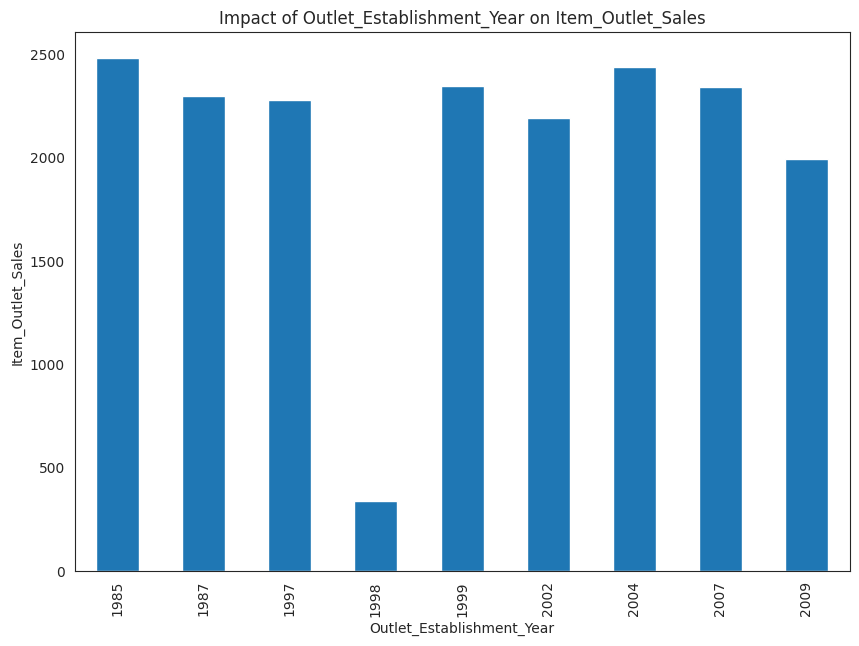

In [19]:
plt.figure(figsize=(10,7))
df_train.groupby('Outlet_Establishment_Year')['Item_Outlet_Sales'].mean().plot.bar()

plt.xlabel("Outlet_Establishment_Year")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Outlet_Establishment_Year on Item_Outlet_Sales")
plt.xticks(rotation=90)
plt.show()

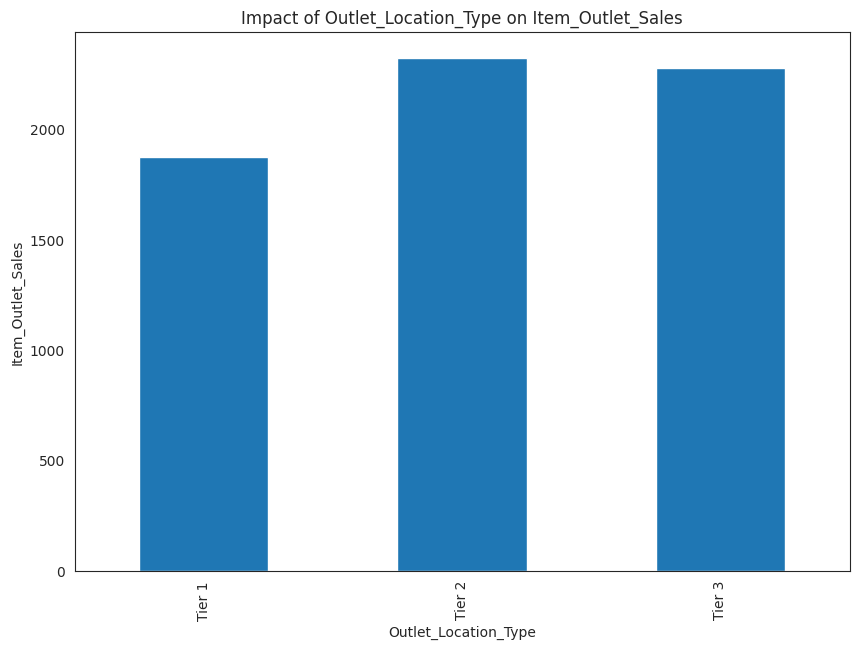

In [20]:
plt.figure(figsize=(10,7))
df_train.groupby('Outlet_Location_Type')['Item_Outlet_Sales'].mean().plot.bar()

plt.xlabel("Outlet_Location_Type")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Outlet_Location_Type on Item_Outlet_Sales")
plt.xticks(rotation=90)
plt.show()

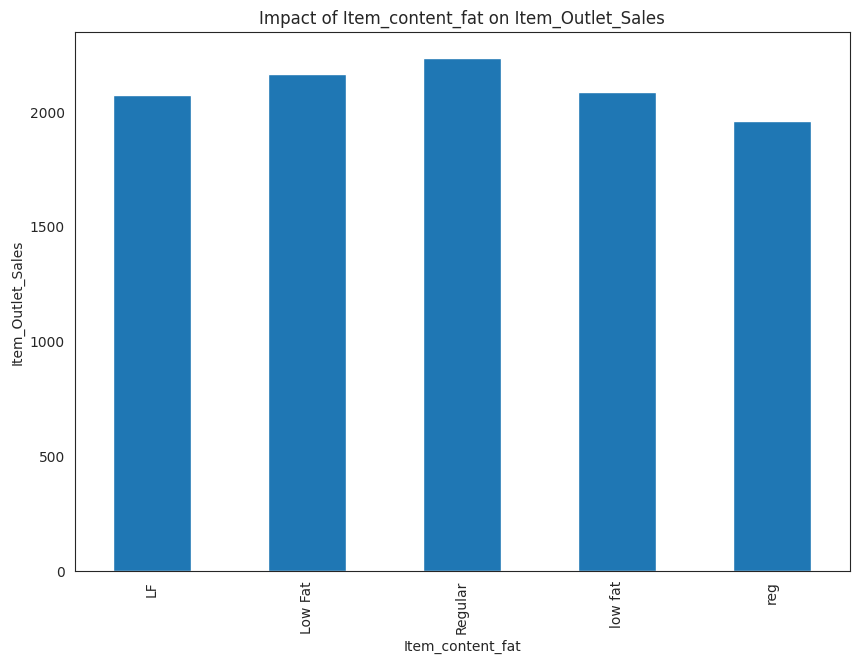

In [21]:
plt.figure(figsize=(10,7))
df_train.groupby('Item_Fat_Content')['Item_Outlet_Sales'].mean().plot.bar()

plt.xlabel("Item_content_fat")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Item_content_fat on Item_Outlet_Sales")
plt.xticks(rotation=90)
plt.show()

In [22]:
df_train['Item_Fat_Content'] = df_train['Item_Fat_Content'].replace({'LF': 'Low Fat', 'reg': 'Regular', 'low fat': 'Low Fat'})
df_train['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

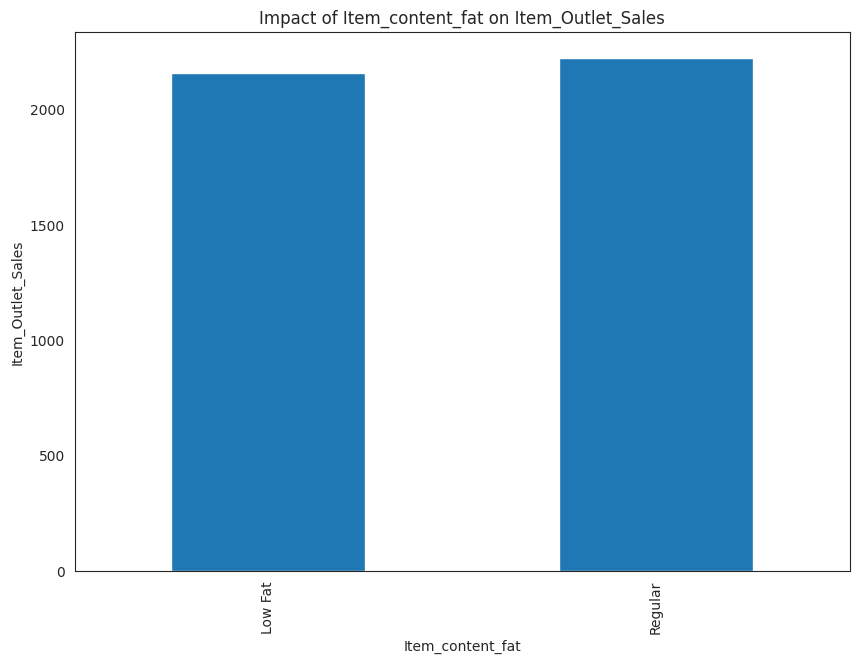

In [23]:
plt.figure(figsize=(10,7))
df_train.groupby('Item_Fat_Content')['Item_Outlet_Sales'].mean().plot.bar()

plt.xlabel("Item_content_fat")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Item_content_fat on Item_Outlet_Sales")
plt.xticks(rotation=90)
plt.show()

In [24]:
df_test['Item_Fat_Content'] = df_test['Item_Fat_Content'].replace({'LF': 'Low Fat', 'reg': 'Regular', 'low fat': 'Low Fat'})
df_test['Item_Fat_Content'].value_counts()

Low Fat    3668
Regular    2013
Name: Item_Fat_Content, dtype: int64

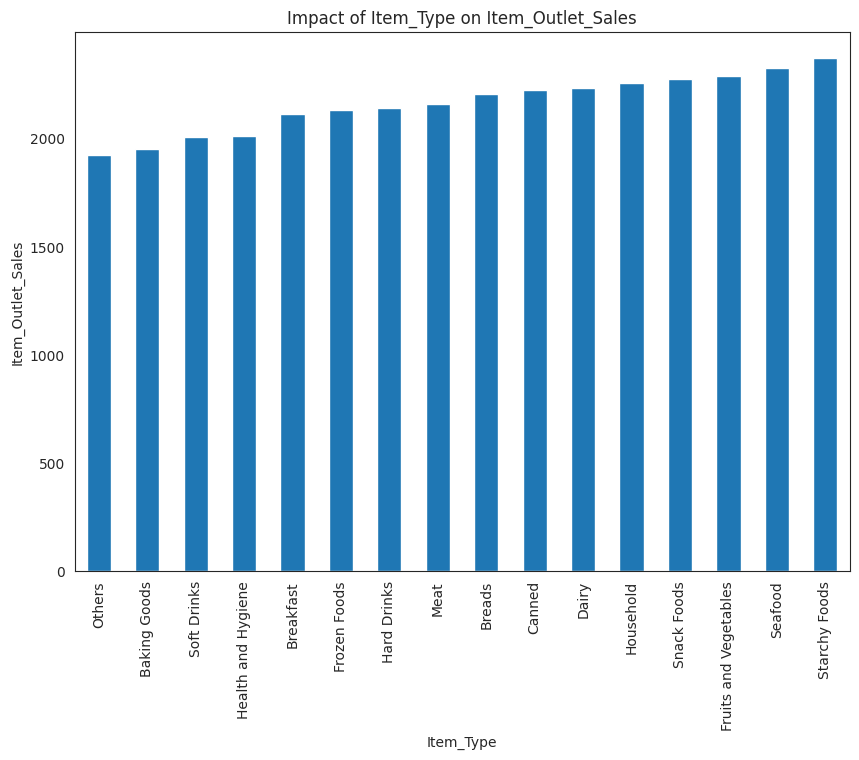

In [25]:
plt.figure(figsize=(10,7))
df_train.groupby('Item_Type')['Item_Outlet_Sales'].mean().sort_values(ascending=True).plot.bar()

plt.xlabel("Item_Type")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Item_Type on Item_Outlet_Sales")
plt.xticks(rotation=90)
plt.show()

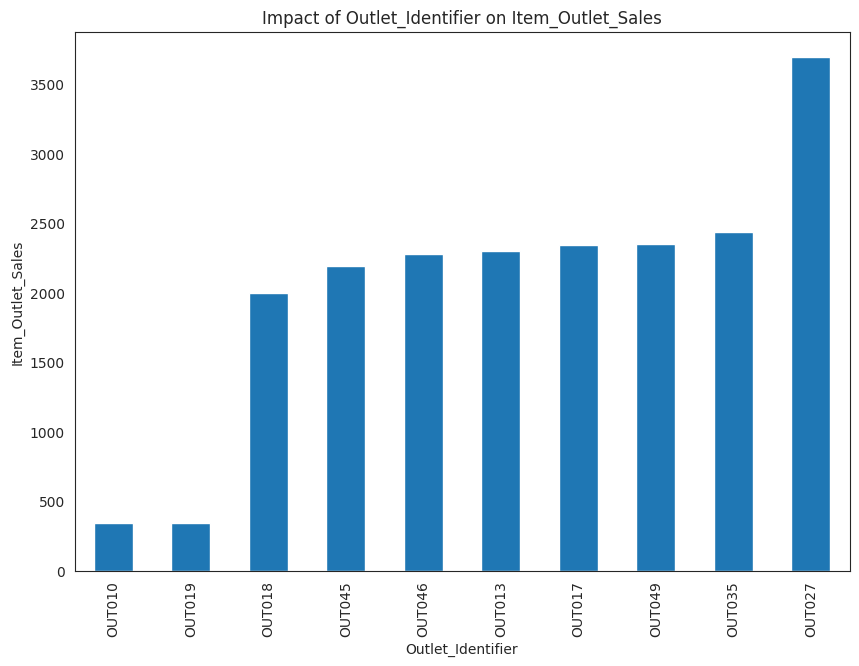

In [26]:
plt.figure(figsize=(10,7))
df_train.groupby('Outlet_Identifier')['Item_Outlet_Sales'].mean().sort_values(ascending=True).plot.bar()

plt.xlabel("Outlet_Identifier")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Outlet_Identifier on Item_Outlet_Sales")
plt.xticks(rotation=90)
plt.show()

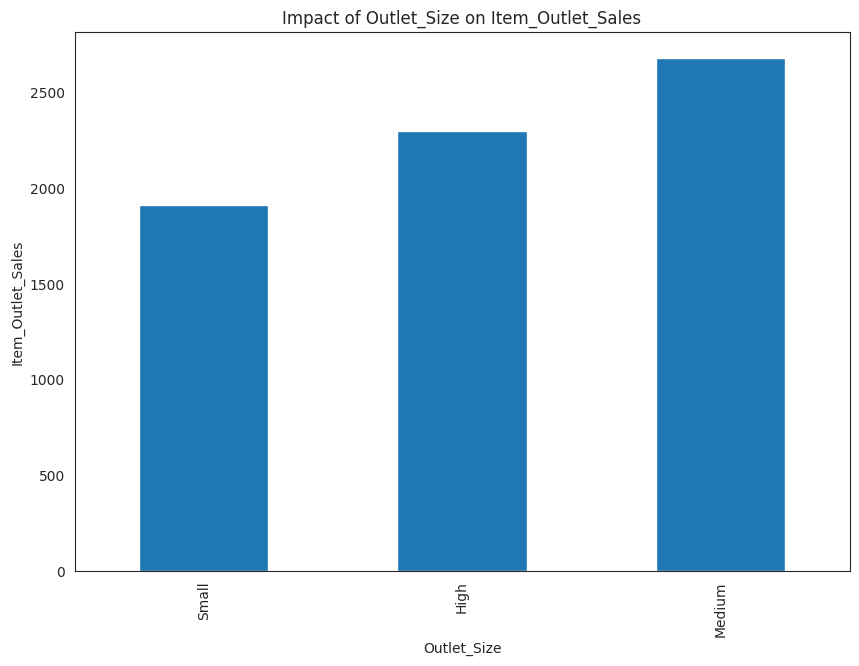

In [27]:
plt.figure(figsize=(10,7))
df_train.groupby('Outlet_Size')['Item_Outlet_Sales'].mean().sort_values(ascending=True).plot.bar()

plt.xlabel("Outlet_Size")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Outlet_Size on Item_Outlet_Sales")
plt.xticks(rotation=90)
plt.show()

HANDLING MISSING VALUE

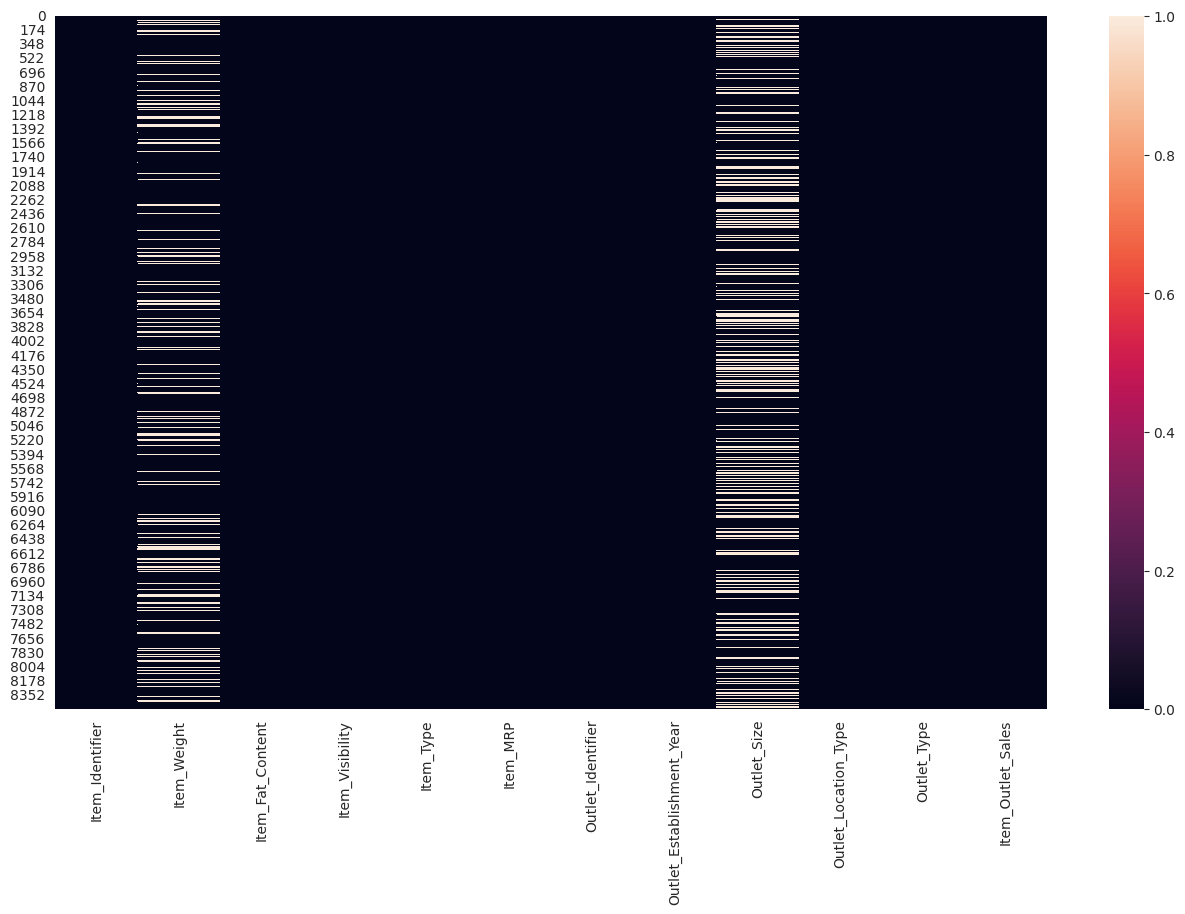

In [28]:
plt.figure(figsize=(16,9))
sns.heatmap(df_train.isnull())

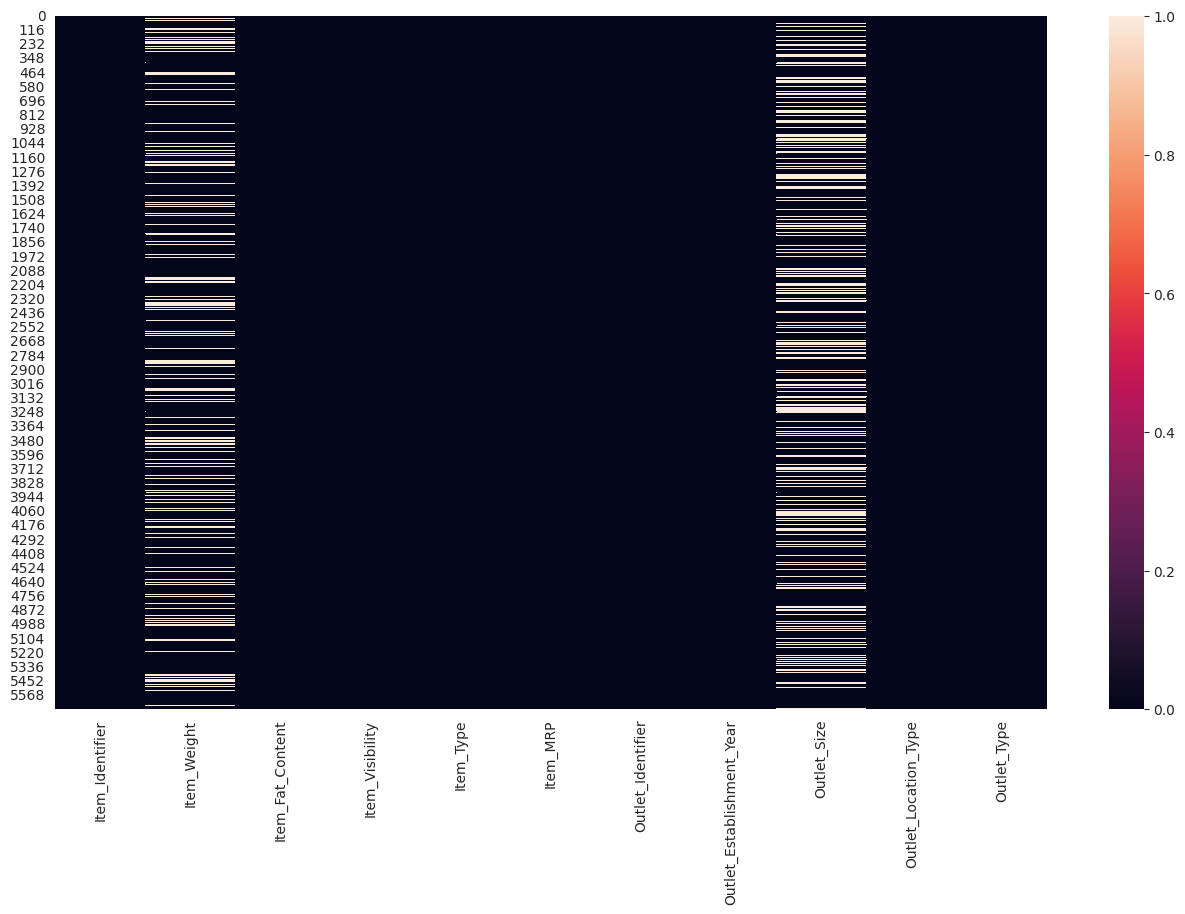

In [29]:
plt.figure(figsize=(16,9))
sns.heatmap(df_test.isnull())

In [30]:
#finding null values train dataset
null_value_train = df_train.isnull().sum()/len(df_train)*100
null_value_train

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

In [31]:
#finding null values test dataset
null_value_test = df_test.isnull().sum()/len(df_test)*100
null_value_test

Item_Identifier               0.000000
Item_Weight                  17.180074
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.269671
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
dtype: float64

In [32]:
for i in df_train.columns:
  tmp = df_train[i].isnull().sum()/len(df_train)*100
  if tmp>10:
    print("Missing values in columns",tmp)

Missing values in columns 17.165317376510618
Missing values in columns 28.27642848762173


In [33]:
for i in df_test.columns:
  tmp = df_test[i].isnull().sum()/len(df_test)*100
  if tmp>10:
    print("Missing values in columns",tmp)

Missing values in columns 17.180073930646014
Missing values in columns 28.269670832599896


In [34]:
df_train['Item_Weight'].describe()

count    7060.000000
mean       12.857645
std         4.643456
min         4.555000
25%         8.773750
50%        12.600000
75%        16.850000
max        21.350000
Name: Item_Weight, dtype: float64

In [35]:
df_train['Item_Weight'].fillna(df_train['Item_Weight'].mean(),inplace = True)
df_test['Item_Weight'].fillna(df_test['Item_Weight'].mean(),inplace = True)


In [36]:
print(df_train['Outlet_Size'].value_counts())
print("#"*200)
print(df_test['Outlet_Size'].value_counts())

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64
########################################################################################################################################################################################################
Medium    1862
Small     1592
High       621
Name: Outlet_Size, dtype: int64


In [37]:
df_train['Outlet_Size'].fillna(df_train['Outlet_Size'].mode()[0], inplace=True)
df_test['Outlet_Size'].fillna(df_test['Outlet_Size'].mode()[0], inplace=True)

In [38]:
print(df_train.isnull().sum())
print("#"*200)
print(df_test.isnull().sum())

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64
########################################################################################################################################################################################################
Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64


In [39]:
print(df_train.head(1))
print("*"*200)
print(df_test.head(1))

  Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility Item_Type  \
0           FDA15          9.3          Low Fat         0.016047     Dairy   

   Item_MRP Outlet_Identifier  Outlet_Establishment_Year Outlet_Size  \
0  249.8092            OUT049                       1999      Medium   

  Outlet_Location_Type        Outlet_Type  Item_Outlet_Sales  
0               Tier 1  Supermarket Type1           3735.138  
********************************************************************************************************************************************************************************************************
  Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility    Item_Type  \
0           FDW58        20.75          Low Fat         0.007565  Snack Foods   

   Item_MRP Outlet_Identifier  Outlet_Establishment_Year Outlet_Size  \
0  107.8622            OUT049                       1999      Medium   

  Outlet_Location_Type        Outlet_Type  
0               Tie

In [40]:
df_train = df_train.drop(['Item_Identifier'],axis=1)
df_test = df_test.drop(['Item_Identifier'],axis=1)



In [41]:
df_train = df_train.drop(['Outlet_Identifier'],axis=1)
df_test = df_test.drop(['Outlet_Identifier'],axis=1)

In [42]:
df_train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,1998,Medium,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052


In [43]:
df_test.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,20.750000,Low Fat,0.007565,Snack Foods,107.8622,1999,Medium,Tier 1,Supermarket Type1
1,8.300000,Regular,0.038428,Dairy,87.3198,2007,Medium,Tier 2,Supermarket Type1
2,14.600000,Low Fat,0.099575,Others,241.7538,1998,Medium,Tier 3,Grocery Store
3,7.315000,Low Fat,0.015388,Snack Foods,155.0340,2007,Medium,Tier 2,Supermarket Type1
4,12.695633,Regular,0.118599,Dairy,234.2300,1985,Medium,Tier 3,Supermarket Type3


## CHECKING SKEWNESS

A skewness value greater than 1 or less than -1 indicates a highly skewed distribution. A value between 0.5 and 1 or -0.5 and -1 is moderately skewed. A value between -0.5 and 0.5 indicates that the distribution is fairly symmetrical.

In [44]:
from scipy.stats import skew

In [45]:
df_train.skew()


Item_Weight                  0.090561
Item_Visibility              1.167091
Item_MRP                     0.127202
Outlet_Establishment_Year   -0.396641
Item_Outlet_Sales            1.177531
dtype: float64

Item_Visibility
skewness of columns are :  1.16688513828559


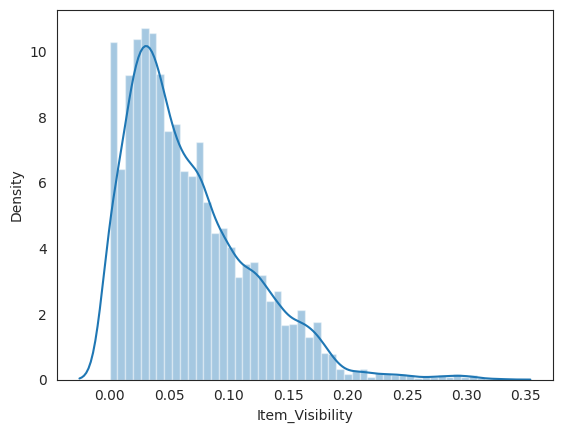

Item_Outlet_Sales
skewness of columns are :  1.1773233539676373


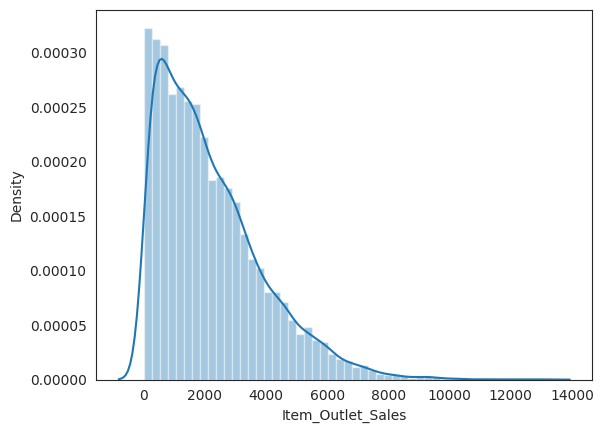

In [46]:
cols = ['Item_Visibility','Item_Outlet_Sales']
for col in cols:
  print(col)
  print("skewness of columns are : ",skew(df_train[col]))

  plt.figure()
  sns.distplot(df_train[col],kde=True )

  plt.show()

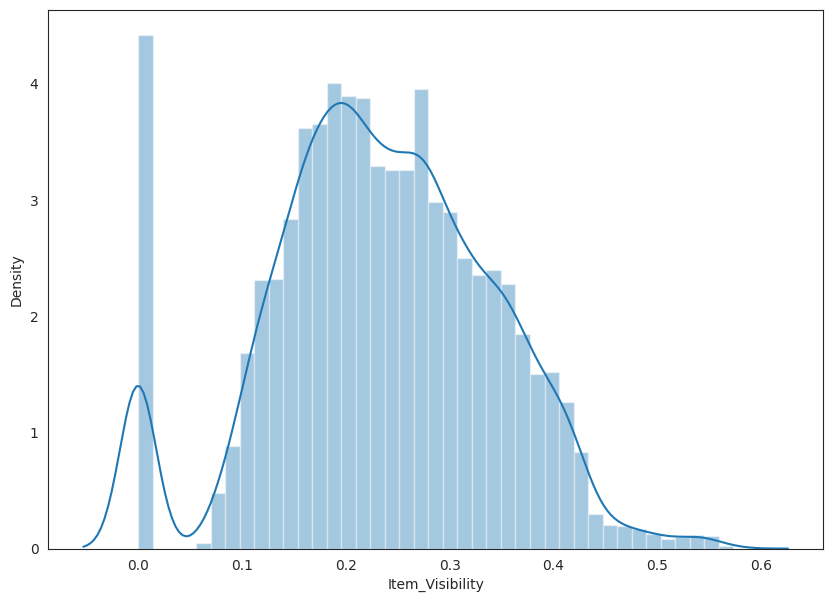

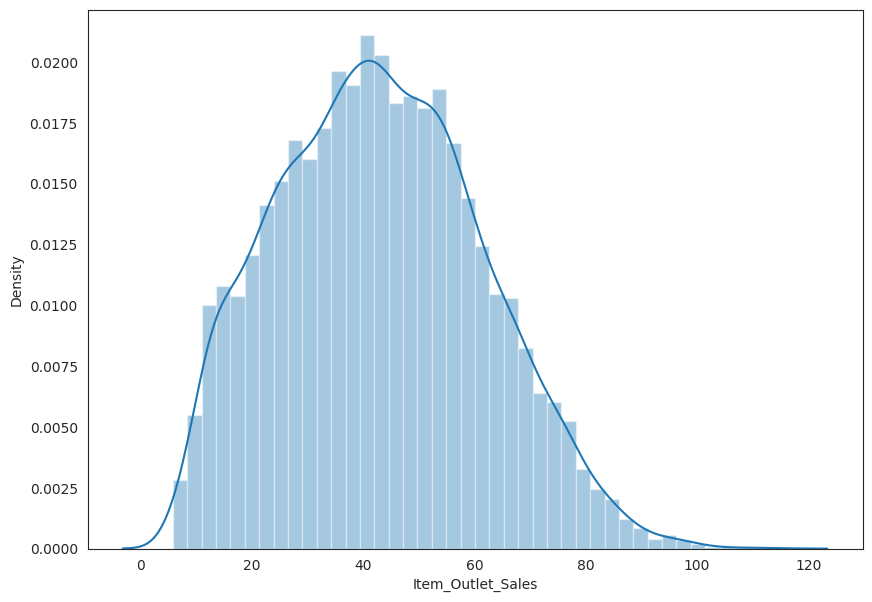

In [47]:
cols = ['Item_Visibility','Item_Outlet_Sales']
for col in cols :
  improve = np.sqrt(df_train[col])

  plt.figure(figsize=(10,7))
  sns.distplot(improve)
  plt.show()

In [48]:
df_test.skew()

Item_Weight                  0.142813
Item_Visibility              1.238312
Item_MRP                     0.136182
Outlet_Establishment_Year   -0.396306
dtype: float64

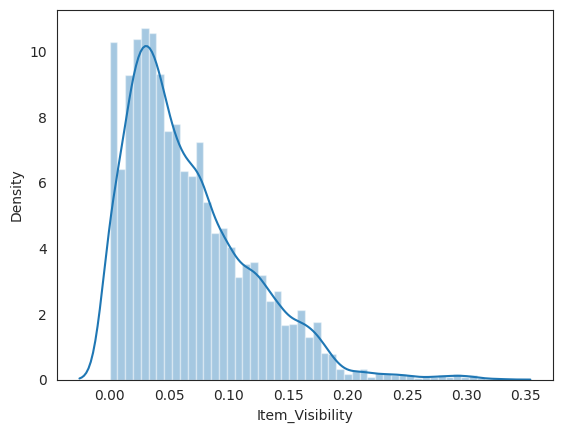

In [49]:
skew(df_test['Item_Visibility'])

plt.figure()
sns.distplot(df_train['Item_Visibility'],kde=True )

plt.show()

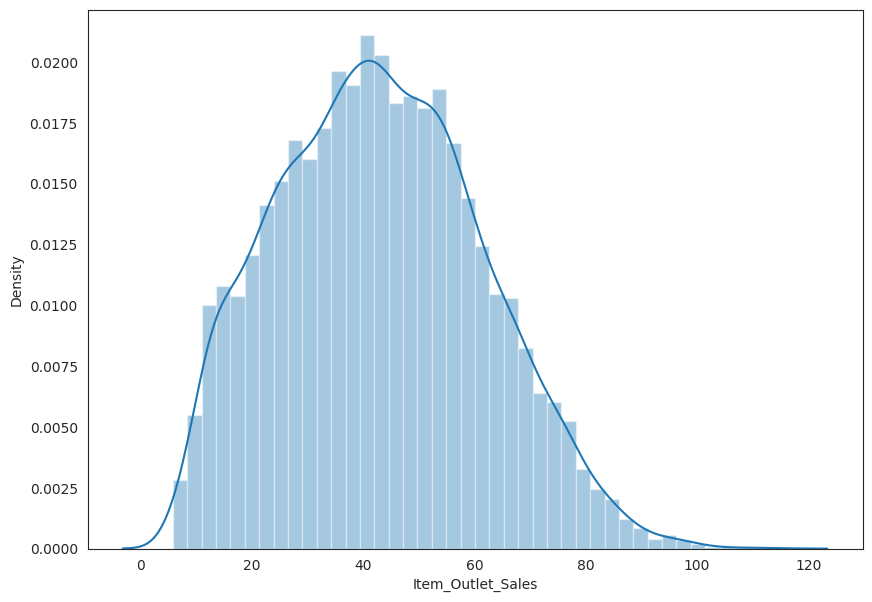

In [50]:
impove=np.sqrt(df_test['Item_Visibility'])

plt.figure(figsize=(10,7))
sns.distplot(improve)
plt.show()

RESOLVING SKEWNESS

In [51]:
df_train['Item_Visibility'] = np.sqrt(df_train['Item_Visibility'])
df_train['Item_Outlet_Sales'] = np.sqrt(df_train['Item_Outlet_Sales'])

In [52]:
df_train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.126678,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,61.115775
1,5.92,Regular,0.138846,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,21.057607
2,17.50,Low Fat,0.129461,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,45.795961
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,1998,Medium,Tier 3,Grocery Store,27.062520
4,8.93,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,31.538947


In [53]:
df_test['Item_Visibility'] = np.sqrt(df_test['Item_Visibility'])
df_test.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,20.750000,Low Fat,0.086976,Snack Foods,107.8622,1999,Medium,Tier 1,Supermarket Type1
1,8.300000,Regular,0.196030,Dairy,87.3198,2007,Medium,Tier 2,Supermarket Type1
2,14.600000,Low Fat,0.315555,Others,241.7538,1998,Medium,Tier 3,Grocery Store
3,7.315000,Low Fat,0.124050,Snack Foods,155.0340,2007,Medium,Tier 2,Supermarket Type1
4,12.695633,Regular,0.344383,Dairy,234.2300,1985,Medium,Tier 3,Supermarket Type3


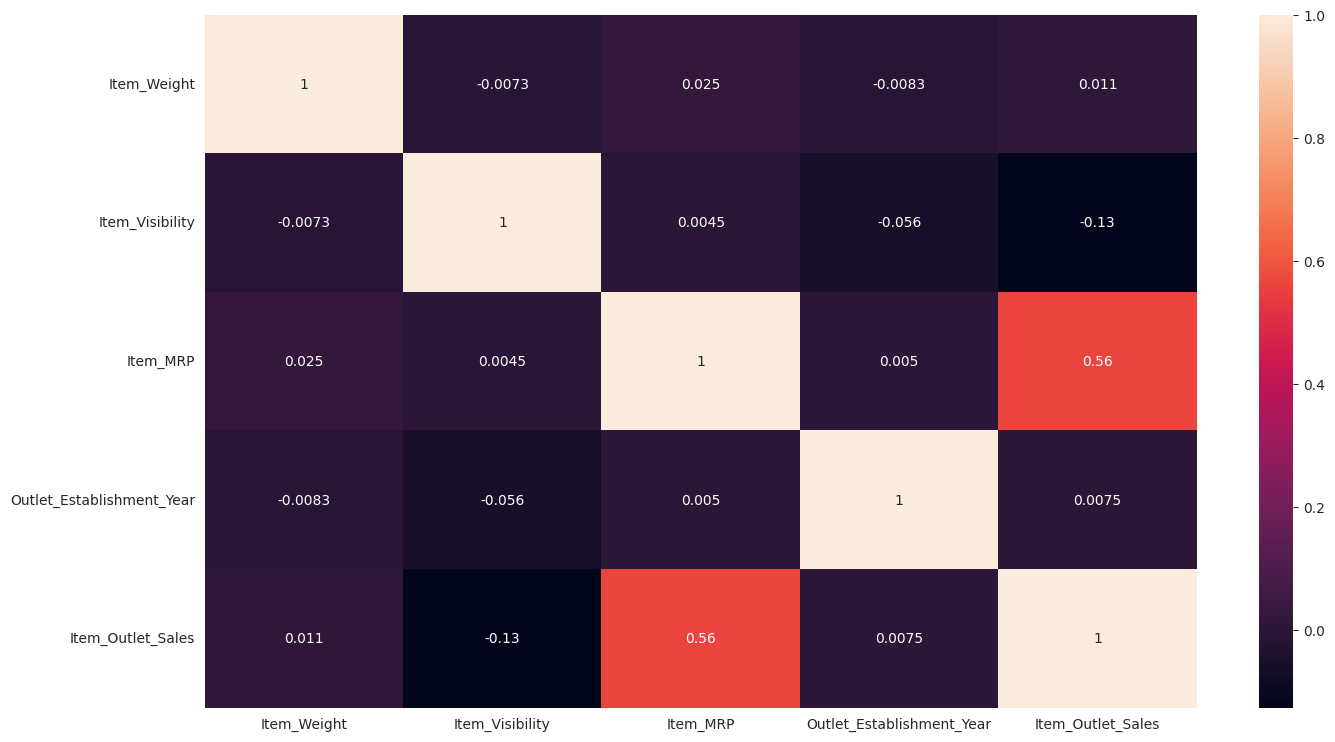

In [54]:
plt.figure(figsize=(16,9))
corr = df_train.corr()
sns.heatmap(corr, annot=True)

LABEL Encoding

In [55]:
df_train.head(3)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.126678,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,61.115775
1,5.92,Regular,0.138846,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,21.057607
2,17.50,Low Fat,0.129461,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,45.795961


In [56]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cat_col = ['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']
for col in cat_col:
    df_train[col] = le.fit_transform(df_train[col])

In [57]:
df_train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,0,0.126678,4,249.8092,1999,1,0,1,61.115775
1,5.92,1,0.138846,14,48.2692,2009,1,2,2,21.057607
2,17.50,0,0.129461,10,141.6180,1999,1,0,1,45.795961
3,19.20,1,0.000000,6,182.0950,1998,1,2,0,27.062520
4,8.93,0,0.000000,9,53.8614,1987,0,2,1,31.538947


In [91]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cat_col = ['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']
for col in cat_col:
    df_test[col] = le.fit_transform(df_test[col])

In [92]:
df_test

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,20.750000,0,0.086976,13,107.8622,1999,1,0,1
1,8.300000,1,0.196030,4,87.3198,2007,1,1,1
2,14.600000,0,0.315555,11,241.7538,1998,1,2,0
3,7.315000,0,0.124050,13,155.0340,2007,1,1,1
4,12.695633,1,0.344383,4,234.2300,1985,1,2,3
...,...,...,...,...,...,...,...,...,...
5676,10.500000,1,0.116174,13,141.3154,1997,2,0,1
5677,7.600000,1,0.378141,15,169.1448,2009,1,2,2
5678,10.000000,0,0.271162,8,118.7440,2002,1,1,1
5679,15.300000,1,0.000000,3,214.6218,2007,1,1,1


ONE HOT ENCODING

In [58]:
df = pd.get_dummies(df_train, columns=['Item_Fat_Content', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'])
df.head()


,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_0,Item_Fat_Content_1,Outlet_Size_0,Outlet_Size_1,Outlet_Size_2,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3
0,9.30,0.126678,4,249.8092,1999,61.115775,1,0,0,1,0,1,0,0,0,1,0,0
1,5.92,0.138846,14,48.2692,2009,21.057607,0,1,0,1,0,0,0,1,0,0,1,0
2,17.50,0.129461,10,141.6180,1999,45.795961,1,0,0,1,0,1,0,0,0,1,0,0
3,19.20,0.000000,6,182.0950,1998,27.062520,0,1,0,1,0,0,0,1,1,0,0,0
4,8.93,0.000000,9,53.8614,1987,31.538947,1,0,1,0,0,0,0,1,0,1,0,0


In [93]:
df_t = pd.get_dummies(df_test, columns=['Item_Fat_Content', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'])
df_t.head()

,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_0,Item_Fat_Content_1,Outlet_Size_0,Outlet_Size_1,Outlet_Size_2,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3
0,20.750000,0.086976,13,107.8622,1999,1,0,0,1,0,1,0,0,0,1,0,0
1,8.300000,0.196030,4,87.3198,2007,0,1,0,1,0,0,1,0,0,1,0,0
2,14.600000,0.315555,11,241.7538,1998,1,0,0,1,0,0,0,1,1,0,0,0
3,7.315000,0.124050,13,155.0340,2007,1,0,0,1,0,0,1,0,0,1,0,0
4,12.695633,0.344383,4,234.2300,1985,0,1,0,1,0,0,0,1,0,0,0,1


TRAIN TEST SPLIT

In [59]:
X = df_train.drop(['Item_Outlet_Sales'],axis=1)
y = df_train['Item_Outlet_Sales']

In [60]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 101)

In [61]:
X_train

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
3684,19.250,0,0.318887,4,54.6956,1987,0,2,1
1935,7.630,0,0.247810,14,94.6436,2007,1,1,1
5142,19.350,1,0.256692,10,167.0816,2007,1,1,1
4978,6.380,0,0.178601,4,177.4344,1997,2,0,1
2299,16.700,0,0.148696,4,110.8886,2002,1,1,1
...,...,...,...,...,...,...,...,...,...
599,5.000,0,0.209773,14,188.8530,1997,2,0,1
5695,14.650,0,0.413115,7,56.4614,2002,1,1,1
8006,12.500,0,0.137291,8,96.7384,1997,2,0,1
1361,9.695,1,0.359178,0,226.9404,2007,1,1,1


STANDARD SCALING

In [62]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()

In [63]:
X_train_sc = sc.fit_transform(X_train)
X_train_sc

array([[ 1.52290029, -0.74155088,  0.79014414, ..., -1.95699503,
         1.08786619, -0.25964107],
       [-1.23985603, -0.74155088,  0.12749722, ..., -0.28872895,
        -0.13870429, -0.25964107],
       [ 1.54667616,  1.34852514,  0.2103085 , ..., -0.28872895,
        -0.13870429, -0.25964107],
       ...,
       [-0.08197107, -0.74155088, -0.90285444, ...,  1.37953713,
        -1.36527477, -0.25964107],
       [-0.74888428,  1.34852514,  1.16576907, ..., -0.28872895,
        -0.13870429, -0.25964107],
       [ 0.67885683, -0.74155088,  1.56166912, ..., -0.28872895,
         1.08786619,  0.98524841]])

In [64]:
X_test_sc = sc.transform(X_test)
X_test_sc

array([[-0.43860915, -0.74155088,  0.0068392 , ..., -0.28872895,
         1.08786619,  0.98524841],
       [ 1.22570189, -0.74155088, -0.34218944, ..., -1.95699503,
         1.08786619, -0.25964107],
       [-1.21845775,  1.34852514,  0.36579694, ...,  1.37953713,
        -1.36527477, -0.25964107],
       ...,
       [ 0.65508096, -0.74155088,  0.93284931, ..., -0.28872895,
         1.08786619, -1.50453056],
       [ 1.01171904, -0.74155088, -2.18280263, ..., -0.28872895,
         1.08786619,  0.98524841],
       [-1.56558548,  1.34852514, -1.25575415, ..., -0.28872895,
        -0.13870429, -0.25964107]])

LINEAR REGRESSION

In [74]:
from sklearn.linear_model import LinearRegression,Lasso
lr = LinearRegression()
lr.fit(X_train_sc,y_train) 

LinearRegression()

In [66]:
lr.score(X_test_sc,y_test)

0.5592989993846087

In [67]:
lr_prediction = lr.predict(X_test_sc)
lr_prediction

array([43.16690201, 40.84847119, 32.40591051, ..., 29.54187382,
       47.52084054, 46.02494891])

In [112]:
data = pd.DataFrame(data={"Predicted ":lr_prediction.flatten(),"Actual":y_test})
data.head(10)

,Predicted,Actual
8179,43.166902,30.080263
8355,40.848471,52.874325
3411,32.405911,44.130092
7089,26.854388,29.544268
6954,45.248160,49.498929
6986,9.151687,13.157051
2512,35.404085,37.124197
6395,44.873801,53.587269
8094,19.439385,10.794211
1004,41.426224,41.131470


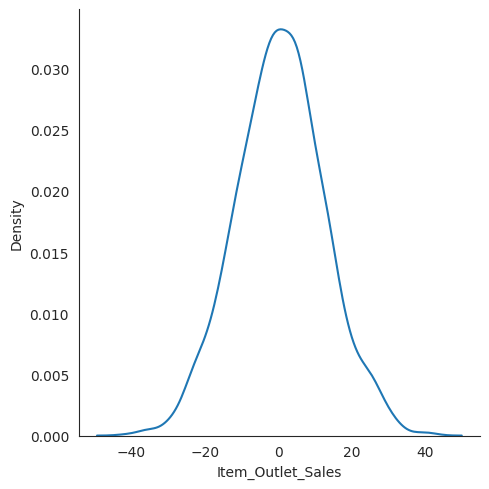

In [69]:
# to see prediction right or wrong we should compare y_predict and truth value y_test
sns.displot(lr_prediction-y_test, kind ='kde')

In [71]:
# the graph is normally distributed from -2000 to 2000  not much variance in the model hence model is working good

R_2 score

In [70]:
from sklearn.metrics import r2_score
score = r2_score(lr_prediction,y_test)
score*100

22.11922402816412

HYPER PARAMETER TUNING

In [72]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split, ShuffleSplit, GridSearchCV

In [75]:
model_params = {
    'random_forest':{
        'model':RandomForestRegressor(),
        'params': {
            'n_estimators': [20,60,100,120],
             'max_features': ['auto', 'sqrt'],
             
                'min_samples_leaf':[1, 2]
        }
    },
    'Xgboost':{
        'model':xgb.XGBRegressor(),
        'params':{
            'n_estimators':[500]
        }
    },
    'LINEAR REGRESSION':{
        'model':LinearRegression(),
        'params':{
            'fit_intercept': [True, False],
                'normalize': [True, False],
                'copy_X': [True, False]
        }
    },
    'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
    }
}

In [78]:
scores = []
for model_name,mp in model_params.items():
  clf1 = GridSearchCV(mp['model'],mp['params'],cv=5, return_train_score=False)
  clf1.fit(X_train_sc,y_train)
  scores.append({
      'model':model_name,
      'best_score':clf1.best_score_,
      'best_params':clf1.best_params_
  })

[19:32:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:32:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:32:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:32:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:32:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:32:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [79]:
df2 = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df2

,model,best_score,best_params
0,random_forest,0.659243,"{'max_features': 'sqrt', 'min_samples_leaf': 2..."
1,Xgboost,0.651149,{'n_estimators': 500}
2,LINEAR REGRESSION,0.565488,"{'copy_X': True, 'fit_intercept': True, 'norma..."
3,lasso,0.529533,"{'alpha': 1, 'selection': 'cyclic'}"


RANDOM FOREST REGRESSION


In [82]:
regressor = RandomForestRegressor(n_estimators=100,max_depth=6, min_samples_leaf=50,n_jobs=4)
regressor.fit(X_train_sc, y_train)
regressor.score(X_test_sc,y_test)

0.6708338299050198

In [81]:
y_pred = regressor.predict(X_test)
y_pred

array([69.8463287 , 60.29078346, 60.38524749, ..., 61.0255169 ,
       69.91485168, 60.33537391])

In [83]:
data = pd.DataFrame(data={"Predicted income":y_pred.flatten(),"Actual income":y_test})
data.head(10)

,Predicted income,Actual income
8179,69.846329,30.080263
8355,60.290783,52.874325
3411,60.385247,44.130092
7089,60.254438,29.544268
6954,60.177954,49.498929
6986,61.105714,13.157051
2512,69.930860,37.124197
6395,60.492055,53.587269
8094,61.132325,10.794211
1004,60.290783,41.131470


XGBOOST REGRESSOR

In [88]:
xg = xgb.XGBRegressor(learning_rate=0.1,max_depth=50,n_estimators=1000)
xg.fit(X_train_sc,y_train)

[19:41:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(max_depth=50, n_estimators=1000)

In [89]:
xg.score(X_test_sc,y_test)

0.5747872619432637

In [94]:
submission_pred = regressor.predict(df_test)
submission_pred

array([59.20124698, 59.42898822, 61.00609429, ..., 59.35913915,
       59.24358454, 59.41405005])

In [108]:
y_test.value_counts()

34.270559    5
29.192876    5
35.077035    4
23.984395    4
41.204247    4
            ..
55.581580    1
62.887614    1
52.962396    1
47.340076    1
49.175051    1
Name: Item_Outlet_Sales, Length: 1297, dtype: int64

In [110]:
a = {'prediction' :submission_pred ,'Test' : y_test}
df = pd.DataFrame.from_dict(a, orient='index')
df = df.transpose()

In [111]:
df.head()

,prediction,Test
0,59.201247,30.080263
1,59.428988,52.874325
2,61.006094,44.130092
3,59.247689,29.544268
4,69.211017,49.498929
